In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/heart.csv')

source = https://www.kaggle.com/ronitf/heart-disease-uci

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
corr =df.corr(method = 'pearson')
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


## We see that no one variable is correlated with heart decease

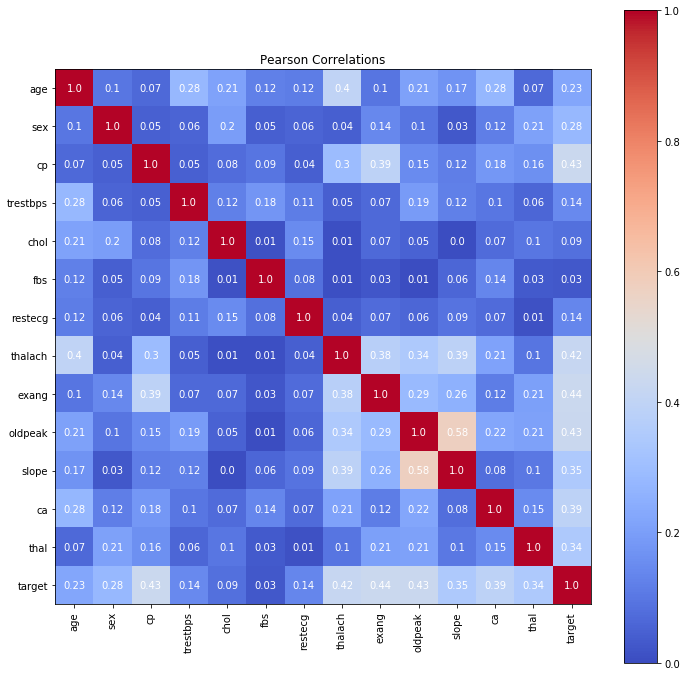

In [5]:
plt.figure(figsize = (12, 12))
plt.imshow(np.abs(corr), cmap = 'coolwarm', vmin = 0, vmax = 1)
plt.colorbar()
ticks = np.arange(0, len(corr), 1)
plt.xticks(ticks, labels = corr.columns, rotation = 90)
plt.yticks(ticks, labels = corr.columns)

for i in ticks:
    for j in ticks:
        plt.text(i, j, np.round(np.abs(corr.iloc[i, j]), 2), ha = 'center', va = 'center', color = 'w')
plt.title('Pearson Correlations');

# Plotting on two variables, we see a better relationship

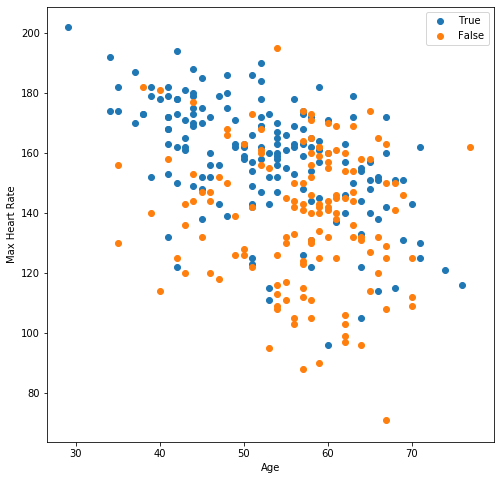

In [6]:
plt.figure(figsize = (8, 8))

for target in df.target.unique():
    mask = df.target == target
    plt.scatter(df.age[mask], df.thalach[mask], label = True if target == 1 else False)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Max Heart Rate');

## We would like to make a model that could predict True or False
## This can be done with logistic regression, for the task of classification

# Before training with gradient descent, it is a good idea to standardize the data

<img src="datasets/norm.png">

## We do so by substracting the mean and dividing by the standard deviation of the data

# $$X_n =   \frac{X-u}{\sigma}$$

In [7]:
def norm_factors(inp):
    u = inp.mean(axis = 0, keepdims = True)
    return  u, inp.std(axis = 0)

In [8]:
x = np.array([df.age.values,df.thalach.values]).T
x.shape

(303, 2)

In [9]:
u, s = norm_factors(x)

In [10]:
x_n = (x-u)/s
x_n.shape

(303, 2)

In [11]:
y = df.target.values.reshape(-1, 1)
y.shape

(303, 1)

# Now values have the same range

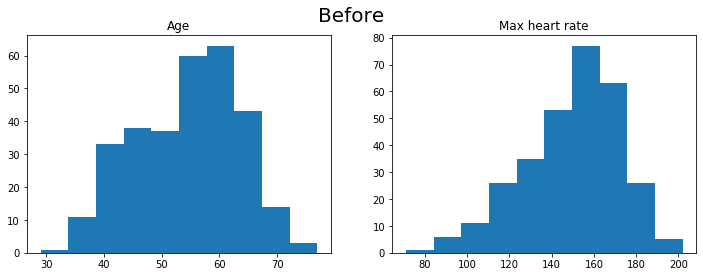

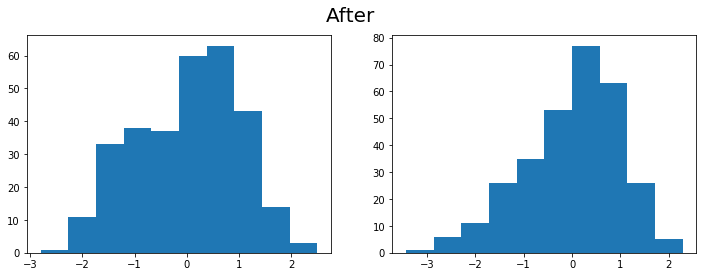

In [12]:
plt.figure(1, figsize = (12, 4))
plt.suptitle(('Before'), fontsize = 20)
plt.subplot(121)
plt.title('Age')
plt.hist(x[:, 0].reshape(-1));
plt.subplot(122)
plt.title('Max heart rate')
plt.hist(x[:, 1].reshape(-1));

plt.figure(2, figsize = (12, 4))
plt.suptitle(('After'), fontsize = 20)
plt.subplot(121)
plt.hist(x_n[:, 0].reshape(-1));
plt.subplot(122)
plt.hist(x_n[:, 1].reshape(-1));

In [13]:
def get_params(shape):
    np.random.seed(7)
    params = {
    'W':np.random.randn(*shape),
    'b':np.zeros((1, shape[1]))
    }
    return params

In [14]:
sigmoid  = lambda x: 1/(1+ np.exp(-x))

In [15]:
def model(inp, params):
    
    z = np.dot(inp, params['W']) + params['b']
    h = sigmoid(z)
    return h

In [16]:
def get_cost(inp, y, params, lambd = 0):
    h= model(inp, params)
    epsilon = 1e-20
    J = -np.mean((y*np.log(h + epsilon))+((1-y)* np.log(1-y +epsilon))) + ((lambd/2*inp.shape[0])*np.sum(params['W']**2)) 
    return J

In [17]:
def grads_dict(params):
    grad_dict = dict()
    for key in params.keys():
        grad_dict['d' + key] = np.zeros(params[key].shape)
    return grad_dict

In [18]:
def train(x, y, epochs = 10000, lr= 1e-3, lambd = 0):
    costs = []
    params= get_params((x.shape[1], y.shape[1]))
    grads = grads_dict(params)
    
    for epoch in range(epochs):
        
        prediction = model(x, params)
        
        
        cost = get_cost(x,y, params, lambd)
        
        delta = (prediction - y)
        grads['dW'] = (np.dot(x.T, delta) + lambd*params['W'])/y.shape[0]
        grads['db'] = np.sum(delta, axis = 0, keepdims = True)/y.shape[0]
        
        for key in params.keys():
             params[key]-= lr* grads['d' + key]
        
        if epoch%(epochs//10) == 0:
            print('Cost at epoch ' + str(epoch), cost)
        
        if epoch%5 == 0:
            costs.append(cost)
    
    return costs, params

In [19]:
costs, params = train(x_n, y, lr= 1e-1)

Cost at epoch 0 0.7440865241163702
Cost at epoch 1000 0.28780112537956687
Cost at epoch 2000 0.28780112091721366
Cost at epoch 3000 0.2878011209171741
Cost at epoch 4000 0.2878011209171741
Cost at epoch 5000 0.2878011209171741
Cost at epoch 6000 0.2878011209171741
Cost at epoch 7000 0.2878011209171741
Cost at epoch 8000 0.2878011209171741
Cost at epoch 9000 0.2878011209171741


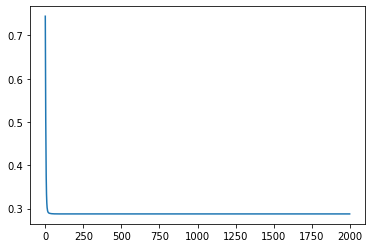

In [20]:
plt.plot(costs);

In [21]:
def get_grid(x):
    a = np.linspace(x[:, 0].min() -1, x[:, 0].max() +1, 1000)
    b = np.linspace(x[:, 1].min() -1, x[:, 1].max()+1, 1000)
    xx, yy = np.meshgrid(a, b, sparse=False)
    zz = np.stack((xx,yy), axis =2)
    
    u, s = norm_factors(x)
    inp = zz.reshape(-1, 2)
    inp_n = (inp-u)/s
    return xx, yy, inp_n

In [22]:
xx, yy, inp_n = get_grid(x)

In [23]:
prediction = model(inp_n, params) > 0.5

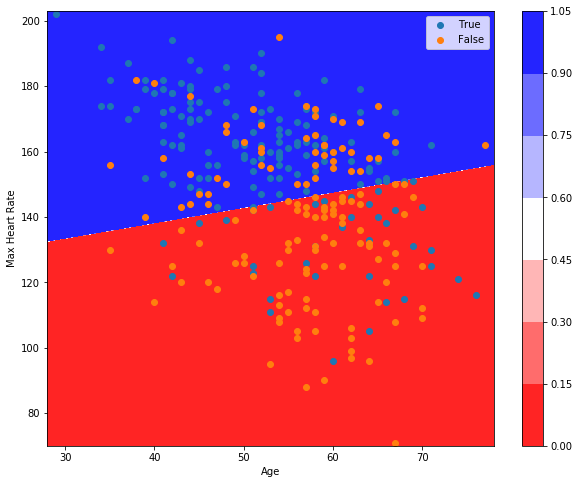

In [24]:
plt.figure(figsize = (10, 8))

plt.contourf(xx, yy, prediction.reshape(xx.shape), cmap = 'bwr_r')
plt.colorbar()

for target in df.target.unique():
    mask = df.target == target
    plt.scatter(df.age[mask], df.thalach[mask], label = True if target == 1 else False)
plt.legend()

plt.xlabel('Age')
plt.ylabel('Max Heart Rate');

## Can we do better? Let's add some polynomials

In [25]:
def add_polynomials(x, order = 5):
    
    x_new = list()
    for i in range(1, order+1):
        for j in range(i+1):
            x_new.append((x[:,0]** (i-j)) *(x[:,1]** (j))) 
    x_new = np.array(x_new)
    
    
    return x_new.T

In [26]:
x_p = add_polynomials(x_n) 

In [27]:
u_p, s_p = norm_factors(x_p)

In [28]:
costs, params = train((x_p - u_p)/s_p, y, lr= 1e-1, epochs = 100000)

Cost at epoch 0 0.6310276262256062
Cost at epoch 10000 0.26467927030003763
Cost at epoch 20000 0.2638275162168358
Cost at epoch 30000 0.2636022060206705
Cost at epoch 40000 0.263505754178234
Cost at epoch 50000 0.26345171679968277
Cost at epoch 60000 0.2634150926981145
Cost at epoch 70000 0.2633869418790968
Cost at epoch 80000 0.263363680284397
Cost at epoch 90000 0.26334371713043847


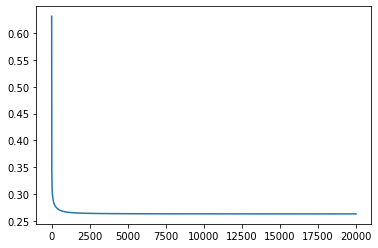

In [29]:
plt.plot(costs)

In [30]:
inp_p = add_polynomials(inp_n)

In [31]:
prediction = model((inp_p - u_p)/s_p, params) > 0.5

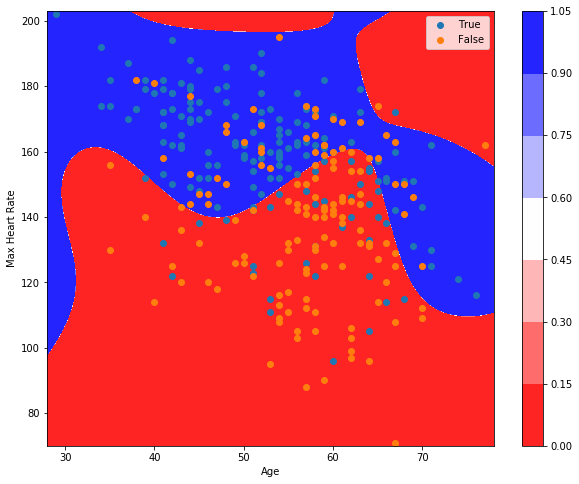

In [32]:
plt.figure(figsize = (10, 8))

plt.contourf(xx, yy, prediction.reshape(xx.shape), cmap = 'bwr_r')
plt.colorbar()

for target in df.target.unique():
    mask = df.target == target
    plt.scatter(df.age[mask], df.thalach[mask], label = True if target == 1 else False)
plt.legend()

plt.xlabel('Age')
plt.ylabel('Max Heart Rate');

In [33]:
np.round(params['W'], 2).T

array([[-1.29,  1.67,  0.25, -0.41,  0.27,  2.57, -0.29, -0.26, -1.7 ,
        -0.1 , -0.62, -0.54,  0.25, -0.95, -1.34, -0.77, -1.37,  0.94,
         1.7 ,  1.09]])

## Let's add regularization

In [34]:
costs, params = train((x_p - u_p)/s_p, y, lr= 1e-1, epochs = 10000, lambd= 5)

Cost at epoch 0 10593.04403529515
Cost at epoch 1000 1002.3520344407212
Cost at epoch 2000 1026.1839370191974
Cost at epoch 3000 1043.8568208455474
Cost at epoch 4000 1046.410045069591
Cost at epoch 5000 1046.744389414362
Cost at epoch 6000 1046.7880457313033
Cost at epoch 7000 1046.7938703282805
Cost at epoch 8000 1046.7946719567162
Cost at epoch 9000 1046.7947862336107


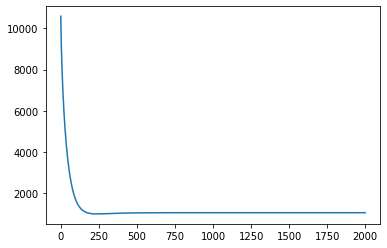

In [35]:
plt.plot(costs)

In [36]:
inp_p = add_polynomials(inp_n)
prediction = model((inp_p - u_p)/s_p, params) > 0.5

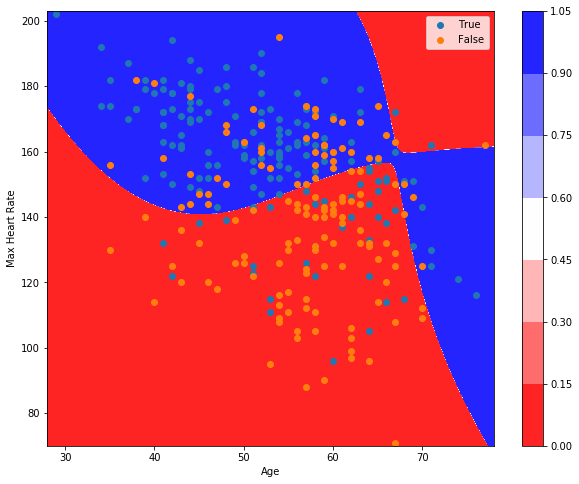

In [37]:
plt.figure(figsize = (10, 8))

plt.contourf(xx, yy, prediction.reshape(xx.shape), cmap = 'bwr_r')
plt.colorbar()

for target in df.target.unique():
    mask = df.target == target
    plt.scatter(df.age[mask], df.thalach[mask], label = True if target == 1 else False)
plt.legend()

plt.xlabel('Age')
plt.ylabel('Max Heart Rate');

In [38]:
np.round(params['W'], 1).T

array([[-0.4,  0.9,  0.1, -0.3, -0.1,  0.3, -0. , -0.1, -0.1, -0.1, -0.3,
        -0.1,  0. , -0.1,  0.1, -0.2, -0. ,  0.1, -0. , -0.1]])